## Coding Exercise #0704b

In [ ]:
#!pip install tensorflow_datasets

In [1]:
#Uncomment to force use of CPU.
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''

#Suppress TF warnings
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

### 1. Multi-layer neural network to recognize the handswritten digits:

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import logging
%matplotlib inline

#### 1.1. Download the MNIST data:

In [3]:
# verbosity_saved = tf.logging.get_verbosity()                                           # Save the current verbosity lebel if needed.
logging.getLogger("tensorflow").setLevel(logging.ERROR)                                  # Set the verbosity lebel high so that most warnings are ignored. 
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = tf.keras.datasets.mnist.load_data()   # Download the data.
type(mnist_train_images)                                                                            # Check the type.

numpy.ndarray

#### 1.2. Take a look at the dataset:

In [4]:
mnist_train_images = mnist_train_images.astype('float32') / 255
mnist_test_images = mnist_test_images.astype('float32') / 255

mnist_train_images = np.expand_dims(mnist_train_images, -1).reshape((mnist_train_images.shape[0],-1))
mnist_test_images = np.expand_dims(mnist_test_images, -1).reshape((mnist_test_images.shape[0],-1))

mnist_train_labels = tf.keras.utils.to_categorical(mnist_train_labels, 10)          # one-hot encoding labels
mnist_test_labels = tf.keras.utils.to_categorical(mnist_test_labels, 10)

Visualization.

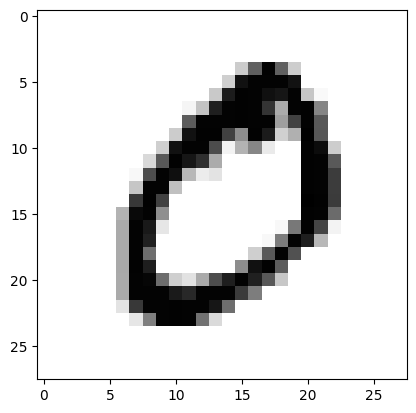

In [5]:
i_image= 1                                                      # Image index. You can change it at will.
a_single_image = mnist_train_images[i_image].reshape(28,28)     #  Reshape as a 2D array.
plt.imshow(1-a_single_image, cmap='gist_gray')                  #  Display as grayscale image.
plt.show()

In [6]:
# Check for the minimum and maximum pixel value.
# The data has been min-max-scaled already!
print("MIN : {}".format(a_single_image.min()))
print("MAX : {}".format(a_single_image.max()))

MIN : 0.0
MAX : 1.0


#### 1.3. Do the necessary definitions: 

In [7]:
batch_size = 30                                # Size of each (mini) batch.
n_epochs  = 20000                              # Number of epochs.
learn_rate = 0.01

In [8]:
# We are building a multi-layer neural network. Thus, several sets of (b,W) required.
# Parameters that connect the input layer with the first hidden layer. 
W1 = tf.Variable(tf.random.normal([784,30],0,1))   # Input = 784 nodes, Output = 30 nodes.   
b1 = tf.Variable(tf.random.normal([30],0,1))     
# Parameters that connect the first hidden layer with the second hidden layer.
W2 = tf.Variable(tf.random.normal([30,15],0,1))    # Input = 30 nodes, Output = 15 nodes (the same as the number of output nodes at the previous layer).
b2 = tf.Variable(tf.random.normal([15],0,1)) 
# Parameters that connect the second hidden layer with the output layer.
W3 = tf.Variable(tf.random.normal([15,10],0,1))    # Input = 15 nodes, Output = 10 nodes (the same as the number of output nodes at the previous layer).
b3 = tf.Variable(tf.random.normal([10],0,1))

2024-05-17 10:30:33.583663: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [9]:
# A multi-layer model.
# As before, the Softmax activation at the output layer is optional. 
#hidden1 = tf.nn.sigmoid(tf.matmul(X_ph,W1) + b1)
#hidden2 = tf.nn.sigmoid(tf.matmul(hidden1,W2) + b2)
#y_model =  tf.matmul(hidden2, W3) + b3

def model(X):
    hidden1 = tf.nn.sigmoid(tf.matmul(X, W1) + b1)
    hidden2 = tf.nn.sigmoid(tf.matmul(hidden1, W2) + b2)
    y_model =  tf.matmul(hidden2, W3) + b3
    return y_model

In [10]:
#loss  = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_ph, logits=y_model))   # loss = Cross Entropy. 
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_true, y_pred))

In [11]:
#optimizer = tf.train.AdamOptimizer(learning_rate = learn_rate)     # A better optimizer.
optimizer = tf.keras.optimizers.Adam(learning_rate=learn_rate)      # A better optimizer.

# optimizer = tf.train.GradientDescentOptimizer(learning_rate = learn_rate)       # A basic optimizer.

In [12]:
#train = optimizer.minimize(loss)

In [13]:
#init = tf.global_variables_initializer()

#### 1.4. Training and Testing:

In [15]:
@tf.function
def train_step(X, y):
    with tf.GradientTape() as tape:
        y_pred = model(X)
        loss_value = loss_fn(y, y_pred)
        gradients = tape.gradient(loss_value, [W1, b1, W2, b2, W3, b3])
        optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2, W3, b3]))

# To replicate functionalities of tensorflow v1.* next_batch():
train_dataset = tf.data.Dataset.from_tensor_slices((mnist_train_images, mnist_train_labels))  # join together images and labels
train_dataset = train_dataset.repeat().batch(batch_size)                                      # yield batches that straddle epoch boundaries
# train_dataset = train_dataset.batch(batch_size).repeat()                                    # if clear epoch separation is needed

# Training.
for i in range(n_epochs):
    batch_X, batch_y = next(iter(train_dataset))                                # Get a batch.
    train_step(batch_X, batch_y)
    if (i + 1) % 2000 == 0:
        print("Step : {}".format(i + 1))                                        # Print the step number at every multiple of 2000.

# Testing.
correct_predictions = tf.equal(tf.argmax(mnist_test_labels, axis=1), tf.argmax(model(mnist_test_images), axis=1))  # In argmax(), axis=1 means horizontal direction.
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))                            # Recast the Boolean as float32 first. Then calculate the mean.
accuracy_value = accuracy.numpy()

Step : 2000


KeyboardInterrupt: 

Print the testing result.

In [19]:
print("Accuracy = {:5.3f}".format(accuracy_value))

Accuracy = 0.958


### This is the equivalent version using keras

In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import logging

2024-05-15 09:38:20.868201: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-15 09:38:21.472462: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Set the verbosity level of TensorFlow to ignore most warnings
logging.getLogger("tensorflow").setLevel(logging.ERROR)

In [4]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data to match the shape expected by the neural network
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

# One-hot encode the labels
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

2024-05-15 09:38:34.377961: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-15 09:38:34.398625: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-15 09:38:34.398667: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-15 09:38:34.400705: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-15 09:38:34.400744: I external/local_xla/xla/stream_executor

In [6]:
# Define batch size and number of epochs
batch_size = 30
n_epochs = 20
learn_rate = 0.01

In [7]:
# Define the model
model = keras.Sequential([
    keras.layers.Dense(30, activation='sigmoid', input_shape=(784,)),
    keras.layers.Dense(15, activation='sigmoid'),
    keras.layers.Dense(10)  # No activation for the output layer
])

/home/davide/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
optimizer = keras.optimizers.Adam(learning_rate=learn_rate)

In [9]:
# Compile the model
model.compile(optimizer=optimizer,
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(buffer_size=len(x_train)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

In [11]:
# Train the model
history = model.fit(train_dataset, epochs=n_epochs, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_dataset)
print("Test Accuracy:", test_accuracy)

Epoch 1/20


I0000 00:00:1715758753.853088    3007 service.cc:145] XLA service 0x7fa644005cb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715758753.853135    3007 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2024-05-15 09:39:13.870501: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-15 09:39:13.940613: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


  96/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4205 - loss: 1.8778

I0000 00:00:1715758755.191442    3007 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8273 - loss: 0.6281
Epoch 2/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9427 - loss: 0.1956
Epoch 3/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9493 - loss: 0.1729
Epoch 4/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9545 - loss: 0.1498
Epoch 5/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9571 - loss: 0.1439
Epoch 6/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9565 - loss: 0.1419
Epoch 7/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9615 - loss: 0.1234
Epoch 8/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9616 - loss: 0.1268
Epoch 9/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9656 - loss: 0.1156
Epoch 10/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9668 - loss: 0.1084
Epoch 11/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9660 - loss: 0.1083
Epoch 12/20
2000/2000 ━━━━━━━━━━━━━━━━━━━